### Synthetic Data Creation, Adding Noise to the data, Exploring & Cleaning the data

In [53]:
import numpy as np
import pandas as pd

#### Generating Synthetic Data

In [54]:
Random_State = 42
np.random.seed(Random_State)

In [55]:
n_samples = 5000

#### Parameters
1. age
2. income
3. emp years
4. credit score
5. existing loans
6. debt to income
7. loan amount
8. interest rate
9. duration i.e. loan tenure

#### Target calculation:
risk score = ( (900 - credit_score) * 0.4 + debt_to_income * 300 + existing_loans * 50 + (loan_amount / annual_income) * 200 + (interest_rate - 8) * 10 )

Here, 900-credit_score*0.4 -more credit score means more chances of getting loan 900-750 = 150 * 0.4 = 60 -risk points

debt to income * 300 gives another risk point all these values are responsible for risk points

In [56]:
age = np.random.randint(21, 65, n_samples)
annual_income = np.random.normal(800000, 300000, n_samples).clip(200000, None)
#.normal -> noraml(Gaussian) Distribution
# Mean -> Average Income = 8lakhs
# Standard Deviation -> Income will typically vary by about 3 lakhs (above/below)
employment_years = np.random.randint(0, 40, n_samples)
credit_score = np.random.normal(680, 60, n_samples).clip(300, 900)
existing_loans = np.random.poisson(2, n_samples)
debt_to_income = np.random.uniform(0.1, 0.8, n_samples)
loan_amount = np.random.normal(500000, 250000, n_samples).clip(50000, None)
interest_rate = np.random.uniform(8, 24, n_samples)
loan_tenure_months = np.random.choice([12, 24, 36, 48, 60], n_samples)

risk_score = (
    (900 - credit_score) * 0.4 +
    debt_to_income * 300 +
    existing_loans * 50 +
    (loan_amount / annual_income) * 200 +
    (interest_rate - 8) * 10
)

default_probability = 1 / (1 + np.exp(-risk_score / 200))
default = np.random.binomial(1, default_probability)
# Bernoulli Trial when n=1
    # Return 1 -> default occurred / 0 -> no default

data = pd.DataFrame({
    "age": age,
    "annual_income": annual_income,
    "employment_years": employment_years,
    "credit_score": credit_score,
    "existing_loans": existing_loans,
    "debt_to_income": debt_to_income,
    "loan_amount": loan_amount,
    "interest_rate": interest_rate,
    "loan_tenure_months": loan_tenure_months,
    "default": default
})

data.head()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.696604e+05,7,709.460237,4,0.747930,246709.974845,23.047913,60,1
1,49,4.828002e+05,26,699.789384,4,0.460381,588472.735054,20.596041,36,1
2,35,6.703629e+05,14,676.293436,4,0.436770,355519.892644,19.768616,60,1
3,63,1.269386e+06,12,689.805669,4,0.797273,911677.761702,22.214834,12,1
4,28,7.259748e+05,15,644.163264,1,0.368751,779753.497258,20.316479,12,1


In [57]:
noisy_data=data.copy()
noisy_data

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.696604e+05,7,709.460237,4,0.747930,246709.974845,23.047913,60,1
1,49,4.828002e+05,26,699.789384,4,0.460381,588472.735054,20.596041,36,1
2,35,6.703629e+05,14,676.293436,4,0.436770,355519.892644,19.768616,60,1
3,63,1.269386e+06,12,689.805669,4,0.797273,911677.761702,22.214834,12,1
4,28,7.259748e+05,15,644.163264,1,0.368751,779753.497258,20.316479,12,1
...,...,...,...,...,...,...,...,...,...,...
4995,53,8.112311e+05,24,756.876179,4,0.451083,538689.423336,18.420542,12,0
4996,52,4.811981e+05,16,686.811290,0,0.519246,676703.611777,16.307141,24,1
4997,49,6.376926e+05,6,694.464739,1,0.286024,414907.727667,14.612556,24,1
4998,41,1.320835e+06,18,578.034229,2,0.242305,102499.819361,13.566304,24,1


### Adding Noise: Gaussian Feature Noise

In [58]:
#noise 1:gaussian feature noise
income_noise=np.random.normal(0,50000,size=len(noisy_data))
noisy_data["annual_income"]+=income_noise
credit_score_noise=np.random.normal(0,25,size=len(noisy_data))
noisy_data["credit_score"]+=credit_score_noise

### Injecting Missing Values

In [59]:
missing_rate=0.1
for col in ["employment_years","annual_income"]:
    missing_indices=noisy_data.sample(frac=missing_rate).index
    noisy_data.loc[missing_indices,col]=np.nan

### Injecting Outliers

In [60]:
#outliers
outlier_rate=0.02
outlier_count=int(outlier_rate*len(noisy_data))
outlier_indices=np.random.choice(noisy_data.index,outlier_count,replace=False)
noisy_data.loc[outlier_indices,"loan_amount"]*=3

In [61]:
noisy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int32  
 1   annual_income       4500 non-null   float64
 2   employment_years    4500 non-null   float64
 3   credit_score        5000 non-null   float64
 4   existing_loans      5000 non-null   int32  
 5   debt_to_income      5000 non-null   float64
 6   loan_amount         5000 non-null   float64
 7   interest_rate       5000 non-null   float64
 8   loan_tenure_months  5000 non-null   int64  
 9   default             5000 non-null   int32  
dtypes: float64(6), int32(3), int64(1)
memory usage: 332.2 KB


In [62]:
noisy_data.describe()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
count,5000.000000,4.500000e+03,4500.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000
mean,42.575000,8.038309e+05,19.329333,680.444263,1.993800,0.449900,5.224291e+05,16.001614,35.79600,0.923400
std,12.554597,2.958239e+05,11.506233,65.215125,1.416108,0.203016,2.992863e+05,4.624248,16.97867,0.265982
min,21.000000,5.868641e+04,0.000000,456.443537,0.000000,0.100126,5.000000e+04,8.001675,12.00000,0.000000
25%,32.000000,5.967067e+05,9.000000,636.639493,1.000000,0.275757,3.279659e+05,11.966318,24.00000,1.000000
50%,43.000000,7.998738e+05,19.000000,680.884791,2.000000,0.449444,4.967643e+05,16.059288,36.00000,1.000000
75%,53.000000,1.006875e+06,29.000000,722.829940,3.000000,0.625953,6.720131e+05,19.967538,48.00000,1.000000
max,64.000000,1.933657e+06,39.000000,953.330061,9.000000,0.799488,3.716370e+06,23.999311,60.00000,1.000000


In [63]:
noisy_data

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
0,59,3.227451e+05,7.0,686.560532,4,0.747930,246709.974845,23.047913,60,1
1,49,4.483824e+05,26.0,725.350117,4,0.460381,588472.735054,20.596041,36,1
2,35,5.954324e+05,14.0,654.883870,4,0.436770,355519.892644,19.768616,60,1
3,63,1.250412e+06,12.0,714.100186,4,0.797273,911677.761702,22.214834,12,1
4,28,6.342550e+05,15.0,670.999150,1,0.368751,779753.497258,20.316479,12,1
...,...,...,...,...,...,...,...,...,...,...
4995,53,8.142029e+05,24.0,754.920606,4,0.451083,538689.423336,18.420542,12,0
4996,52,6.230704e+05,16.0,685.603743,0,0.519246,676703.611777,16.307141,24,1
4997,49,6.499525e+05,6.0,748.846216,1,0.286024,414907.727667,14.612556,24,1
4998,41,1.350126e+06,18.0,569.978517,2,0.242305,102499.819361,13.566304,24,1


## DATA EXPLORATION AND CLEANING

In [64]:
# Basic Sturctural Checks
noisy_data.shape

(5000, 10)

In [65]:
noisy_data.info

<bound method DataFrame.info of       age  annual_income  employment_years  credit_score  existing_loans  \
0      59   3.227451e+05               7.0    686.560532               4   
1      49   4.483824e+05              26.0    725.350117               4   
2      35   5.954324e+05              14.0    654.883870               4   
3      63   1.250412e+06              12.0    714.100186               4   
4      28   6.342550e+05              15.0    670.999150               1   
...   ...            ...               ...           ...             ...   
4995   53   8.142029e+05              24.0    754.920606               4   
4996   52   6.230704e+05              16.0    685.603743               0   
4997   49   6.499525e+05               6.0    748.846216               1   
4998   41   1.350126e+06              18.0    569.978517               2   
4999   41            NaN               6.0    504.664078               3   

      debt_to_income    loan_amount  interest_rate  loa

In [66]:
noisy_data.describe()

,age,annual_income,employment_years,credit_score,existing_loans,debt_to_income,loan_amount,interest_rate,loan_tenure_months,default
count,5000.000000,4.500000e+03,4500.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000,5000.000000
mean,42.575000,8.038309e+05,19.329333,680.444263,1.993800,0.449900,5.224291e+05,16.001614,35.79600,0.923400
std,12.554597,2.958239e+05,11.506233,65.215125,1.416108,0.203016,2.992863e+05,4.624248,16.97867,0.265982
min,21.000000,5.868641e+04,0.000000,456.443537,0.000000,0.100126,5.000000e+04,8.001675,12.00000,0.000000
25%,32.000000,5.967067e+05,9.000000,636.639493,1.000000,0.275757,3.279659e+05,11.966318,24.00000,1.000000
50%,43.000000,7.998738e+05,19.000000,680.884791,2.000000,0.449444,4.967643e+05,16.059288,36.00000,1.000000
75%,53.000000,1.006875e+06,29.000000,722.829940,3.000000,0.625953,6.720131e+05,19.967538,48.00000,1.000000
max,64.000000,1.933657e+06,39.000000,953.330061,9.000000,0.799488,3.716370e+06,23.999311,60.00000,1.000000


In [67]:
#Transpose of the data
noisy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,42.575000,12.554597,21.000000,32.000000,43.000000,5.300000e+01,6.400000e+01
annual_income,4500.0,803830.945100,295823.928531,58686.413013,596706.723725,799873.811684,1.006875e+06,1.933657e+06
employment_years,4500.0,19.329333,11.506233,0.000000,9.000000,19.000000,2.900000e+01,3.900000e+01
credit_score,5000.0,680.444263,65.215125,456.443537,636.639493,680.884791,7.228299e+02,9.533301e+02
existing_loans,5000.0,1.993800,1.416108,0.000000,1.000000,2.000000,3.000000e+00,9.000000e+00
debt_to_income,5000.0,0.449900,0.203016,0.100126,0.275757,0.449444,6.259534e-01,7.994881e-01
loan_amount,5000.0,522429.092571,299286.332180,50000.000000,327965.897203,496764.281150,6.720131e+05,3.716370e+06
interest_rate,5000.0,16.001614,4.624248,8.001675,11.966318,16.059288,1.996754e+01,2.399931e+01
loan_tenure_months,5000.0,35.796000,16.978670,12.000000,24.000000,36.000000,4.800000e+01,6.000000e+01
default,5000.0,0.923400,0.265982,0.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


In [68]:
noisy_data.isnull().sum()

age                     0
annual_income         500
employment_years      500
credit_score            0
existing_loans          0
debt_to_income          0
loan_amount             0
interest_rate           0
loan_tenure_months      0
default                 0
dtype: int64

In [69]:
(noisy_data.isnull().sum()/n_samples)*100
#(noisy_data.isnull().mean()*100).round(2)

age                    0.0
annual_income         10.0
employment_years      10.0
credit_score           0.0
existing_loans         0.0
debt_to_income         0.0
loan_amount            0.0
interest_rate          0.0
loan_tenure_months     0.0
default                0.0
dtype: float64

In [70]:
noisy_data["default"].value_counts(normalize=True)

default
1    0.9234
0    0.0766
Name: proportion, dtype: float64

In [71]:
import matplotlib.pyplot as plt

### Plotting the Data

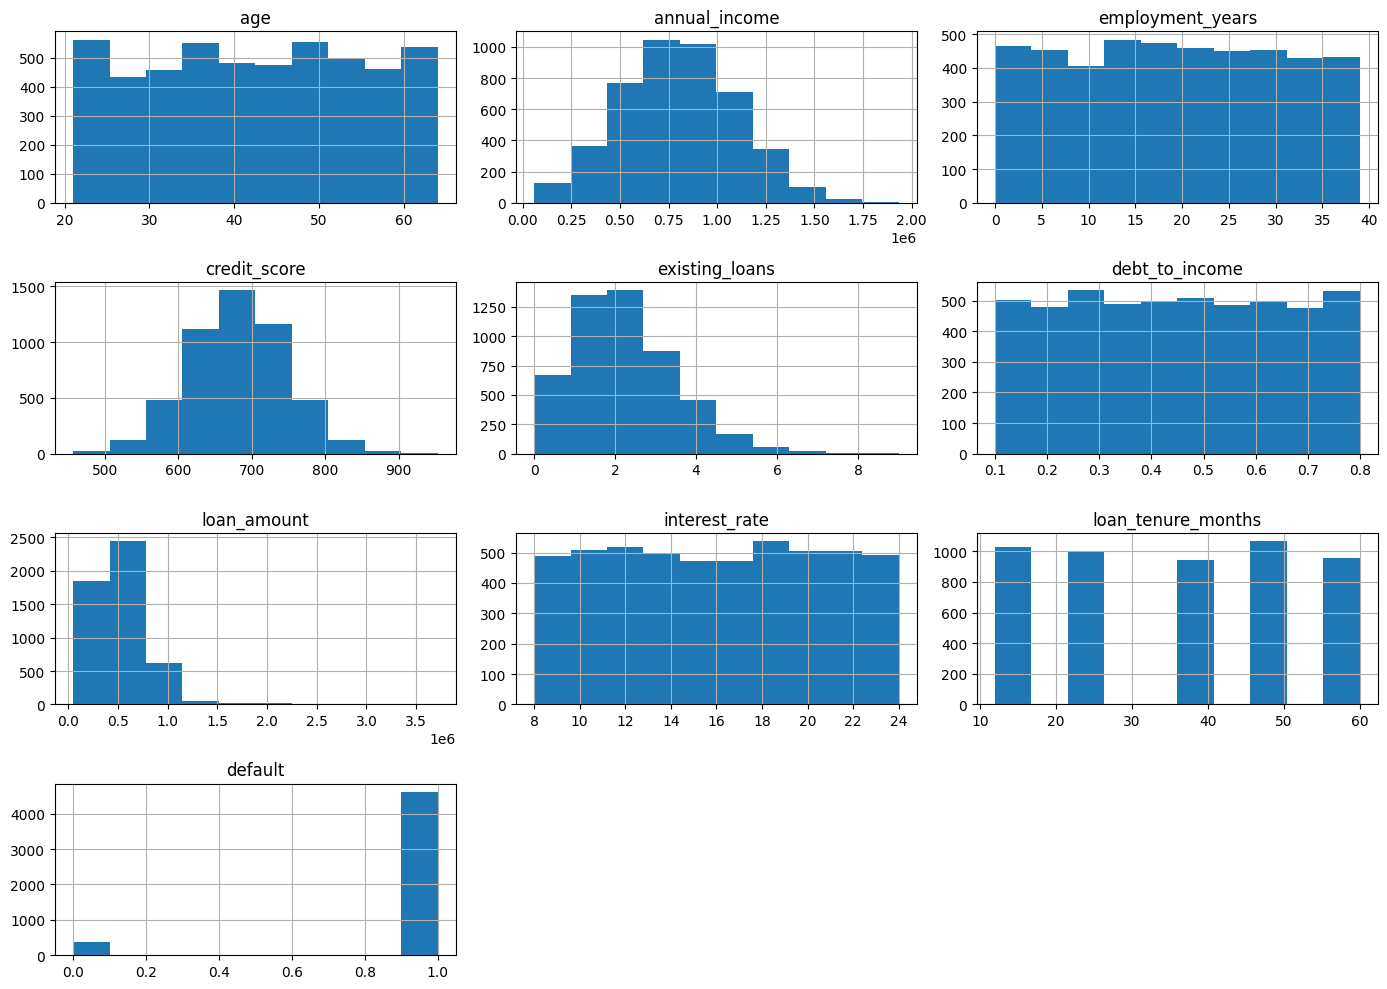

In [72]:
noisy_data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

In [73]:
# outliers inter quartile region (IQR)
def detect_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return df[(df[column] < lower) | (df[column] > upper)]

In [74]:
detect_outliers_iqr(noisy_data,"loan_amount").shape

(91, 10)

In [75]:
detect_outliers_iqr(noisy_data,"annual_income").shape

(14, 10)

#### Credit Score v/s Default

In [76]:
# credit score vs default
noisy_data.groupby("default")["credit_score"].mean()

default
0    691.615920
1    679.517526
Name: credit_score, dtype: float64

In [77]:
noisy_data.groupby("default")["debt_to_income"].mean()

default
0    0.383818
1    0.455382
Name: debt_to_income, dtype: float64

In [78]:
import seaborn as sns

<Axes: >

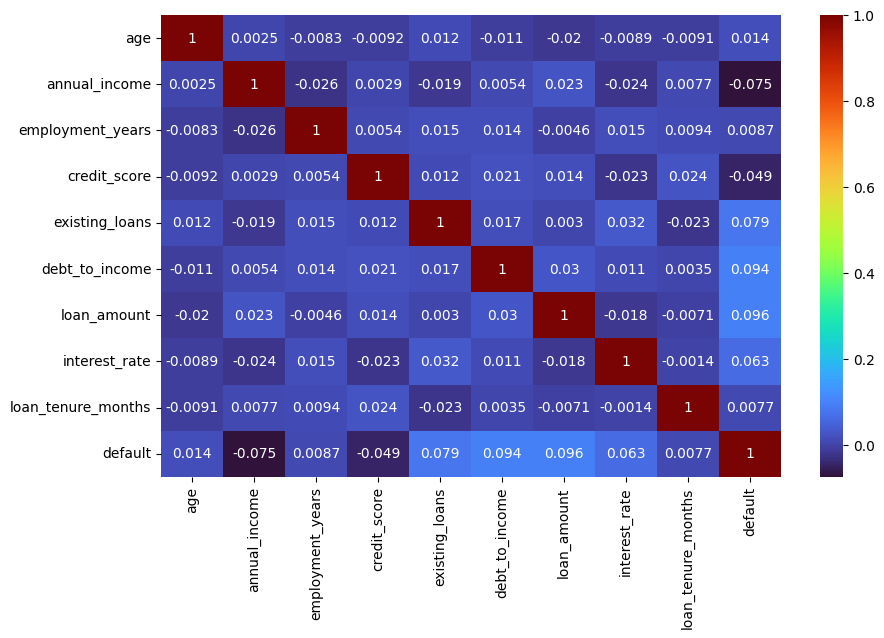

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(noisy_data.corr(), annot=True,cmap= "turbo")

In [80]:
noisy_data["annual_income"].fillna(
    noisy_data["annual_income"].mean(), inplace=True
)

C:\Users\HP\AppData\Local\Temp\ipykernel_18628\2752638213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["annual_income"].fillna(


In [81]:
noisy_data["employment_years"].fillna(
    noisy_data["employment_years"].mean(), inplace=True
)

C:\Users\HP\AppData\Local\Temp\ipykernel_18628\3757149479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  noisy_data["employment_years"].fillna(


In [82]:
noisy_data.isnull().sum()

age                   0
annual_income         0
employment_years      0
credit_score          0
existing_loans        0
debt_to_income        0
loan_amount           0
interest_rate         0
loan_tenure_months    0
default               0
dtype: int64

In [83]:
# handling outliers- winsorization(percentile capping)
loan_cap=noisy_data["loan_amount"].quantile(0.99)
noisy_data["loan_amount"]=noisy_data["loan_amount"].clip(upper=loan_cap)